# Search in MAST catalogs 

https://astroquery.readthedocs.io/en/latest/mast/mast.html

In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS

from astroquery.simbad import Simbad
from astroquery.mast import Observations

import astropy.coordinates as coordinates
from astropy.coordinates import SkyCoord
from astropy.coordinates import angular_separation
from astropy.coordinates import Angle
import astropy.units as u

In [2]:
import h5py
import pandas as pd
import numpy as np

In [3]:
from astropy.table.pprint import conf
#conf.max_lines = -1
#conf.max_width = -1

In [4]:
def GetColumnHfData(hff,list_of_keys,nameval):
    """
    Extract hff atttribute 
    
    parameters
      hff           : descriptor of h5 file
      list_of_keys : list of exposures
      nameval      : name of the attribute
      
    return
           the array of values in the order of 
    """
    all_data = []
    for key in list_of_keys:
        group=hff.get(key)
        val=group.attrs[nameval]
        all_data.append(val)
    return all_data


In [5]:
def ReadFors2h5FileAttributes(hf):
    hf =  h5py.File(input_file_h5, 'r') 
    list_of_keys = list(hf.keys())
    # pick one key    
    key_sel =  list_of_keys[0]
    # pick one group
    group = hf.get(key_sel)  
    #pickup all attribute names
    all_subgroup_keys = []
    for k in group.attrs.keys():
        all_subgroup_keys.append(k)
    # create info
    df_info = pd.DataFrame()
    for key in all_subgroup_keys:
        arr=GetColumnHfData(hf, list_of_keys ,key)
        df_info[key] = arr
    df_info.sort_values(by="num", ascending=True,inplace=True)
    df_info_num = df_info["num"].values
    key_tags = [ f"SPEC{num}" for num in df_info_num ]
    df_info["name"] = key_tags
    
    #'Nsp', 'RT', 'RV', 'Rmag', 'dec', 'eRV', 'lines', 'num', 'ra', 'redshift',
    
    df_info = df_info[['num' ,'name', 'ra', 'dec', 'Rmag','redshift','lines','RT','RV','eRV','Nsp']]
    return df_info

## Read Fors2

In [6]:
input_file_h5  = '../data/FORS2spectra.hdf5'

In [7]:
hf =  h5py.File(input_file_h5, 'r') 
list_of_keys = list(hf.keys())

In [8]:
df_info = ReadFors2h5FileAttributes(hf)

In [9]:
df_info

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,Nsp
51,2,SPEC2,13.52997,-28.44776,21.18,0.34555,"b'K,H,G,H{beta} ...",12.3,103665,40,1
112,3,SPEC3,13.52552,-28.42080,21.45,0.68660,"b'[OII],H9,K,H,H{beta},[OIII],H8 ...",11.6,210642,48,4
545,9,SPEC9,13.50219,-28.40641,21.60,0.29266,"b'H9,H8,K,H ...",13.1,87798,58,1
17,13,SPEC13,13.49261,-28.38272,23.14,0.68870,"b'[OII],H{epsilon},H{delta},H{beta} ...",0.0,206610,0,1
43,19,SPEC19,13.60758,-28.43452,21.70,0.48395,"b'H10,H9,H8,K,H,H{delta} ...",7.1,145185,104,1
...,...,...,...,...,...,...,...,...,...,...,...
531,734,SPEC734,13.68083,-28.23290,0.00,0.23012,"b'[OII],H9,K,H,H{alpha},NII ...",7.2,69036,71,1
532,735,SPEC735,13.69958,-28.23161,19.28,0.36169,"b'K,H,G,H{beta} ...",8.2,108507,107,1
533,736,SPEC736,13.66431,-28.22849,21.64,0.55777,"b'[OII],H9,H{beta},[OIII] ...",10.5,167331,31,1
534,737,SPEC737,13.62722,-28.22692,21.40,0.52001,"b'[OII],K,H ...",10.2,156003,53,1


## Observations

In [10]:
print(Observations.list_missions())

['IUE', 'FIMS-SPEAR', 'BEFS', 'HUT', 'GALEX', 'Kepler', 'KeplerFFI', 'HLA', 'HST', 'EUVE', 'TUES', 'TESS', 'K2', 'K2FFI', 'HLSP', 'JWST', 'SPITZER_SHA', 'PS1', 'OPO', 'WUPPE', 'SWIFT', 'FUSE']


## Target

In [11]:
target_name_simbad = "BAX 013.5117-28.3994"
target_name_ned = "RX J0054.0-2823"

In [12]:
result_table = Simbad.query_object(target_name_simbad)

In [13]:
ra_str = result_table['RA'][0] + ' hours'
dec_str = result_table['DEC'][0] + ' degree'

In [14]:
coord = coordinates.SkyCoord(ra_str,dec_str)
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (13.51166667, -28.39944444)>

## MAST Observations

In [15]:
obs_table = Observations.query_object(target_name_simbad,radius="0.25deg")

In [16]:
obs_table 

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str5,str17,str10,str4,str4,str16,str32,str1,str73,float64,float64,str10,str19,int64,float64,float64,float64,float64,float64,str14,float64,str23,str3,int64,str133,str120,str129,str6,bool,float64,str9,float64
science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,--,tess-s0003-2-4,18.82454293614978,-31.040788897335645,image,"Ricker, George",3,58381.546141770836,58408.879141261576,1425.599424,600.0,1000.0,--,58507.6666666,N/A,--,3,POLYGON 22.278127 -23.114227 28.285859 -33.79011 14.400627 -38.731614 10.254244 -27.780414 22.278127 -23.114227,--,--,PUBLIC,False,nan,60942206,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,--,tess-s0029-2-3,10.878597490217892,-34.65291393027482,image,"Ricker, George",3,59087.74000385,59113.93468316,475.199793,600.0,1000.0,--,59158.0,N/A,--,29,POLYGON 12.83654500 -26.68156200 21.20849700 -35.67388800 8.41085100 -42.87851500 1.00297300 -32.50456800 12.83654500 -26.68156200,--,--,PUBLIC,False,nan,27972860,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,--,tess-s0030-2-4,21.316275513239678,-29.928875993165978,image,"Ricker, George",3,59115.38607926,59142.7260047,475.199788,600.0,1000.0,--,59173.0,N/A,--,30,POLYGON 24.81211600 -22.02902800 30.63496600 -32.75918900 16.88033600 -37.59161500 12.86359200 -26.62078800 24.81211600 -22.02902800,--,--,PUBLIC,False,nan,28055405,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,63787839,--,tess2020238165205-s0029-0000000063787839-0193-s,13.2895194155193,-28.2973699972947,timeseries,"Ricker, George",3,59087.74282196,59113.93772419,120.0,600.0,1000.0,--,59158.0,G03272,--,29,CIRCLE ICRS 13.28951942 -28.29737000 0.00138889,--,mast:TESS/product/tess2020238165205-s0029-0000000063787839-0193-s_lc.fits,PUBLIC,False,nan,27901915,789.0070932805666
science,PS1,3PI,GPC1,PS1,g,OPTICAL,0638.085,--,rings.v3.skycell.0638.085.stk.g,13.441716292531964,-28.59309734059033,image,--,3,55447.4769591,56625.270336885165,645.0,394299987792.96875,559299987792.9688,PS1 3PI Survey,57741.5416666,--,3PI,--,POLYGON ICRS 13.689784 -28.810830 13.689703 -28.375747 13.194721 -28.374921 13.192657 -28.809989,http://ps1images.stsci.edu/cgi-bin/fitscut.cgi?red=rings.v3.skycell/0638/085/rings.v3.skycell.0638.085.stk.g.unconv.fits,http://ps1images.stsci.edu/rings.v3.skycell/0638/085/rings.v3.skycell.0638.085.stk.g.unconv.fits,PUBLIC,--,5885.0,1766282,0.0
science,PS1,3PI,GPC1,PS1,i,OPTICAL,0638.085,--,rings.v3.skycell.0638.085.stk.i,13.441716292531964,-28.59309734059033,image,--,3,55457.4569304,56917.52311593336,1260.0,677799987792.9688,830400024414.0625,PS1 3PI Survey,57741.5416666,--,3PI,--,POLYGON ICRS 13.689784 -28.810830 13.689703 -28.375747 13.194721 -28.374921 13.192657 -28.809989,http://ps1images.stsci.edu/cgi-bin/fitscut.cgi?red=rings.v3.skycell/0638/085/rings.v3.skycell.0638.085.stk.i.unconv.fits,http://ps1images.stsci.edu/rings.v3.skycell/0638/085/rings.v3.skycell.0638.085.stk.i.unconv.fits,PUBLIC,--,5885.0,1766283,0.0
science,PS1,3PI,GPC1,PS1,r,OPTICAL,0638.085,--,rings.v3.skycell.0638.085.stk.r,13.441716292531964,-28.59309734059033,image,--,3,55447.5014007,56988.28977063336,950.0,538599975585.9375,703599975585.9375,PS1 3PI Survey,57741.5416666,--,3PI,--,POLYGON ICRS 13.689784 -28.810830 13.689703 -28.375747 13.194721 -28.374921 13.192657 -28.809989,http://ps1images.stsci.edu/cgi-bin/fitscut.cgi?red=rings.v3.skycell/0638/085/rings.v3.skycell.0638.085.stk.r.unconv.fits,http://ps1images.stsci.edu/rings.v3.skycell/0638/085/rings.v3.skycell.0638.085.stk.r.unconv.fits,PUBLIC,--,5885.0,1766284,0.0
science,PS1,3PI,GPC1,PS1,y,OPTICAL;INFRARED,0638.085,--,rings.v3.skycell.0638.085.stk.y,13.441716292531964,-28.59309734059033,imag

In [17]:
obs_table = Observations.query_criteria(filters=["*UV","Kepler"],objectname=target_name_simbad)

In [18]:
obs_table

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,objID1,distance
str7,str5,str3,str5,str3,str3,str2,str12,str1,str19,float64,float64,str5,str1,int64,float64,float64,float64,float64,float64,str1,float64,str1,str3,int64,str43,str117,str111,str6,bool,float64,str5,str5,str5,float64
science,GALEX,AIS,GALEX,AIS,NUV,UV,AIS_281_1_14,--,6380802579076481024,13.375796567031102,-28.1265195718468,image,--,2,54055.71357638889,54055.714826388896,108.0,169300000000.0,300700000000.0,--,55421.58981478,--,AIS,--,CIRCLE ICRS 13.37579657 -28.12651957 0.625,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50281-AIS_281/d/01-main/0001-img/07-try/qa/AIS_281_sg14-xd-int_2color.jpg,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50281-AIS_281/d/01-main/0001-img/07-try/AIS_281_sg14-nd-exp.fits.gz,PUBLIC,--,5885.0,29873,52324,52324,0.0
science,GALEX,AIS,GALEX,AIS,FUV,UV,AIS_281_1_14,--,6380802579076481024,13.375796567031102,-28.1265195718468,image,--,2,54055.71357638889,54055.714826388896,108.0,134000000000.0,180600000000.0,--,55421.58981478,--,AIS,--,CIRCLE ICRS 13.37579657 -28.12651957 0.625,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50281-AIS_281/d/01-main/0001-img/07-try/qa/AIS_281_sg14-xd-int_2color.jpg,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50281-AIS_281/d/01-main/0001-img/07-try/AIS_281_sg14-fd-cnt.fits.gz,PUBLIC,--,5885.0,29873,52325,52325,0.0


In [19]:
print(Observations.query_object_count(target_name_simbad,radius=".25 deg"))  

311


In [20]:
print(Observations.query_criteria_count(dataproduct_type="image",filters=["NUV","FUV"]))

79164


In [21]:
obs_table = Observations.query_object(target_name_simbad,radius=".25 deg")

data_products_by_obs = Observations.get_product_list(obs_table[0:2])

print(data_products_by_obs)  

 obsID   obs_collection dataproduct_type ... parent_obsid dataRights calib_level
-------- -------------- ---------------- ... ------------ ---------- -----------
60928817           TESS            image ...     60942206     PUBLIC           2
60928817           TESS            image ...     60942206     PUBLIC           1
60925595           TESS            image ...     60942206     PUBLIC           2
60925595           TESS            image ...     60942206     PUBLIC           1
60940487           TESS            image ...     60942206     PUBLIC           2
60940487           TESS            image ...     60942206     PUBLIC           1
60936931           TESS            image ...     60942206     PUBLIC           2
60936931           TESS            image ...     60942206     PUBLIC           1
60926639           TESS            image ...     60942206     PUBLIC           2
     ...            ...              ... ...          ...        ...         ...
27969268           TESS     

In [22]:
data_products_by_obs = Observations.get_product_list(obs_table)

In [23]:
print(data_products_by_obs)  

 obsID   obs_collection dataproduct_type ... parent_obsid dataRights calib_level
-------- -------------- ---------------- ... ------------ ---------- -----------
  110382          GALEX            image ...        29873     PUBLIC           2
  110382          GALEX            image ...        29873     PUBLIC           2
  110382          GALEX            image ...        29873     PUBLIC           2
  110382          GALEX            image ...        29873     PUBLIC           2
  110382          GALEX            image ...        29873     PUBLIC           2
  110382          GALEX            image ...        29873     PUBLIC           2
  110382          GALEX            image ...        29873     PUBLIC           2
  110382          GALEX            image ...        29873     PUBLIC           2
  110382          GALEX            image ...        29873     PUBLIC           2
     ...            ...              ... ...          ...        ...         ...
28051274           TESS     

## Missions

In [24]:
from astroquery.mast import MastMissions

missions = MastMissions()

In [25]:
missions.mission

'hst'

In [26]:
columns = missions.get_column_list()

In [27]:
columns

name,data_type,description
str22,str9,str226
search_pos,string,Search Position (RA and Dec)
sci_data_set_name,string,"Data set name, the first character indicates instrument; L=COS; I=WFC3; J=ACS; N=NICMOS; O=STIS; U=WFPC2; W=WFPC; X=FOC; Y=FOS; Z=GHRS; F=FGS; V=HSP; nine-character name (e.g. J8BA7JCAQ, O4140Q020)"
sci_archive_class,string,"Archive ingest classification, where the only choices are CAL='calibrated science' and AST='astrometric' (FGS only)"
sci_program_id,string,"Internal program ID, which is not the same as proposal ID; Three-character name (e.g. 8G6, 9FA, 8M8, 4QA)"
sci_obset_id,string,"Observation set ID, indicating the fourth and fifth letters of a dataset name. In most cases, this is usually the observation visit number; Two-character name (e.g. 10, 42, G1, GA, H6)"
sci_obsnum,string,"Observation number, used in the Science Operations Ground System (SOGS) header; (e.g. 01, 02, RO, 011, AK, 070)"
sci_asn_id,string,"The association ID for the dataset (result of combining individual exposures), identical to the data set name; If used to build an association, this field indicates the combined data sets (e.g. null, O4QA01010, J8ZO02010)"
sci_targname,string,"Target name designated by the observer for the HST proposal; Uppercase; No blank characters; Spaces sometimes filled with - ; (e.g. A901-FIELD-25, NGC4486-POS1, 0537-441INCA221-36, ALPHA-CEN)"
sci_target_descrip,substring,"Target description specified by the observer from a key field used in the Astronomer's Proposal Tool (APT); Uppercase (e.g. GALAXY;SEYFERT;STARBURST, ISM;HI CLOUD, STAR;PULSAR, PLANET;EXOSPHERE OF MARS)"


In [28]:
results = missions.query_region(coord, radius=0.25)

In [29]:
results

search_pos,sci_data_set_name,sci_targname,sci_ra,sci_dec,sci_refnum,sci_start_time,sci_stop_time,sci_actual_duration,sci_instrume,sci_aper_1234,sci_spec_1234,sci_central_wavelength,sci_pep_id,sci_pi_last_name,sci_release_date,sci_preview_name,scp_scan_type,sci_hlsp,ang_sep
str1,str1,str1,float64,float64,int64,str1,str1,float64,str1,str1,str1,float64,int64,str1,str1,str1,str1,int64,str1


# Catalog




    The Hubble Source Catalog (HSC)

    The GALEX Catalog (V2 and V3)

    The Gaia (DR1 and DR2) and TGAS Catalogs

    The TESS Input Catalog (TIC)

    The TESS Candidate Target List (CTL)

    The Disk Detective Catalog

    The PanSTARRS Catalog (DR1 and DR2)

    The All-Sky PLATO Input Catalog (DR1)


In [30]:
from astroquery.mast import Catalogs

## Galex

In [31]:
catalog_data = Catalogs.query_object(target_name_simbad, catalog="Galex")

In [32]:
catalog_data

distance_arcmin,objID,survey,ra,dec,band,fov_radius,IAUName,nuv_exptime,fuv_exptime,fuv_mag,fuv_magerr,nuv_mag,nuv_magerr,fuv_flux,fuv_fluxerr,nuv_flux,nuv_fluxerr,e_bv,ra_cent,dec_cent,xCenter,yCenter,SSAPFitsFile,nuv_flux_auto,nuv_flux_aper_7,nuv_artifact,fuv_flux_auto,fuv_flux_aper_7,fuv_artifact
float64,str19,str3,float64,float64,int64,float64,str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,int64,float64,float64,int64
1.007453327937128,6380802579077530534,AIS,13.49358223794343,-28.40468652758306,1,0.296882182,GALEX J005358.4-282416,108.0,108.0,--,--,21.5107937,0.3604291,--,--,9.029878,2.9968977,0.0180339962,13.3758,-28.12652,1953.991,1915.793,--,0.2677209,0.269305468,0,--,--,0
1.1570112318343508,6380802579077530499,AIS,13.52442935213248,-28.41510001695875,1,0.316882282,GALEX J005405.8-282454,108.0,108.0,--,--,22.173336,0.472773343,--,--,4.905293,2.13544345,0.0175703857,13.3758,-28.12652,1953.991,1915.793,--,0.1454338,0.113484353,0,--,--,0
1.2850870876665763,6380802579077530550,AIS,13.48753421553544,-28.40202009154056,1,0.292551041,GALEX J005357.0-282407,108.0,108.0,--,--,22.7267532,0.53684485,--,--,2.94644356,1.45652211,0.0180339962,13.3758,-28.12652,1953.991,1915.793,--,0.08735716,-0.0596656837,0,--,--,0
1.363584856331773,6380802579077530502,AIS,13.49267323055165,-28.41477545277933,1,0.30608356,GALEX J005358.2-282453,108.0,108.0,--,--,22.3088741,0.45572567,--,--,4.32962465,1.81687009,0.0180339962,13.3758,-28.12652,1953.991,1915.793,--,0.128366187,0.12960507,0,--,--,0
1.3815148586786572,6380802579077530542,AIS,13.53755642425988,-28.40298585619871,1,0.311017841,GALEX J005409.0-282410,108.0,108.0,--,--,22.4501553,0.5138618,--,--,3.801349,1.79868126,0.0187648423,13.3758,-28.12652,1953.991,1915.793,--,0.1127037,0.040572945,0,--,--,0
1.5200551875845891,6380802579077530547,AIS,13.54047227358614,-28.39828638191474,1,0.308050334,GALEX J005409.7-282353,108.0,108.0,--,--,21.3266182,0.315423965,--,--,10.6992226,3.10754251,0.0187648423,13.3758,-28.12652,1953.991,1915.793,--,0.317214221,0.2249951,0,--,--,0
1.6883066524555321,6380802579078582610,AIS,13.53805431735773,-28.3834546228873,2,0.294011921,GALEX J005409.1-282300,108.0,108.0,21.6375866,0.460561663,--,--,8.034657,3.407417,--,--,0.0191500764,13.3758,-28.12652,1953.991,1915.793,--,--,--,0,0.0746389255,0.03671759,0
1.723165844919715,6380802579077530443,AIS,13.51667761958675,-28.42778377828719,1,0.325811625,GALEX J005404.0-282540,108.0,108.0,--,--,22.1070976,0.438837051,--,--,5.21387529,2.10685229,0.0175703857,13.3758,-28.12652,1953.991,1915.793,--,0.154582754,0.0130709559,0,--,--,0
1.7356234878325882,6380802579077530498,AIS,13.48321810055538,-28.41386192357071,1,0.3025168,GALEX J005355.9-282449,108.0,108.0,--,--,22.4108486,0.480143726,--,--,3.94149017,1.74261677,0.0169403125,13.3758,-28.12652,1953.991,1915.793,--,0.116858654,0.1946647,0,--,--,0


In [33]:
all_ra = catalog_data['ra'].data
all_dec = catalog_data['dec'].data

In [34]:
catalog_galex = SkyCoord(all_ra*u.degree,all_dec*u.degree)

In [41]:
df_info

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,Nsp
51,2,SPEC2,13.52997,-28.44776,21.18,0.34555,"b'K,H,G,H{beta} ...",12.3,103665,40,1
112,3,SPEC3,13.52552,-28.42080,21.45,0.68660,"b'[OII],H9,K,H,H{beta},[OIII],H8 ...",11.6,210642,48,4
545,9,SPEC9,13.50219,-28.40641,21.60,0.29266,"b'H9,H8,K,H ...",13.1,87798,58,1
17,13,SPEC13,13.49261,-28.38272,23.14,0.68870,"b'[OII],H{epsilon},H{delta},H{beta} ...",0.0,206610,0,1
43,19,SPEC19,13.60758,-28.43452,21.70,0.48395,"b'H10,H9,H8,K,H,H{delta} ...",7.1,145185,104,1
...,...,...,...,...,...,...,...,...,...,...,...
531,734,SPEC734,13.68083,-28.23290,0.00,0.23012,"b'[OII],H9,K,H,H{alpha},NII ...",7.2,69036,71,1
532,735,SPEC735,13.69958,-28.23161,19.28,0.36169,"b'K,H,G,H{beta} ...",8.2,108507,107,1
533,736,SPEC736,13.66431,-28.22849,21.64,0.55777,"b'[OII],H9,H{beta},[OIII] ...",10.5,167331,31,1
534,737,SPEC737,13.62722,-28.22692,21.40,0.52001,"b'[OII],K,H ...",10.2,156003,53,1


In [44]:
all_idx = []  # index of the match
all_d2d = []  # distance in arcsec
all_d3d = []

for index, row in df_info.iterrows():
    c = coordinates.SkyCoord(row['ra']*u.degree, row['dec']*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog_galex)
    all_idx.append(idx)
    all_d2d.append(Angle(d2d[0]).arcsec)
    all_d3d.append(d3d)
    # print(idx,Angle(d2d[0]).arcsec,d3d)

Text(0.5, 0, 'cross-match angle in arcsec')

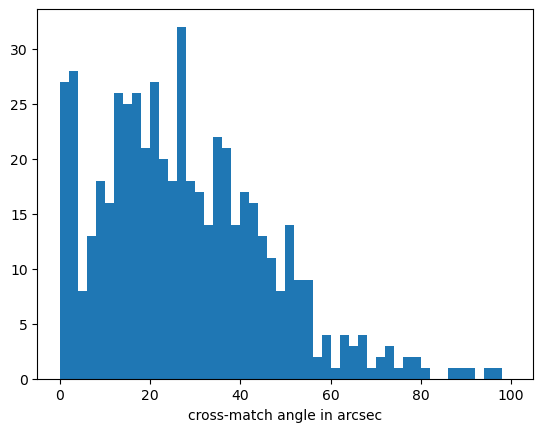

In [43]:
plt.hist(all_d2d,bins=50,range=(0,100));
plt.xlabel("cross-match angle in arcsec")